# k-최근접 이웃 회귀

## 데이터 준비

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
                         1000.0, 1000.0])

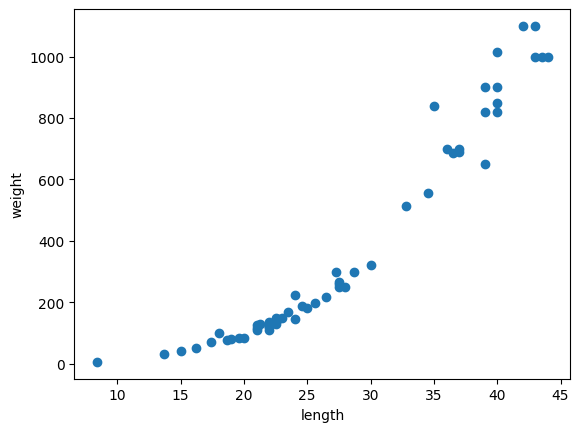

In [130]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [131]:
from sklearn.model_selection import train_test_split

# train, test 데이터 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input.shape, test_input.shape)


(42,) (14,)


In [132]:
# reshape 예제
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

test_array = test_array.reshape(2, 2)
print(test_array.shape)

# # 잘못된 reshape 예제
# test_array = test_array.reshape(2, 3)

(4,)
(2, 2)


In [133]:
# 학습에 맞는 데이터 형태로 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [134]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)


knr.score(test_input, test_target)


0.992809406101064

In [135]:
# 다양한 방식의 r2 score 계산
# ssr = ((train_target - knr.predict(train_input)) ** 2).sum()
# sst = ((train_target - train_target.mean()) ** 2).sum()
# r2_2 = 1 - (ssr / sst)
# print(r2_2)
# 
# from sklearn.metrics import r2_score
# r2_1 = r2_score(train_target, knr.predict(train_input))
# print(r2_1)
# 
# r2_3 = knr.score(train_input, train_target)
# print(r2_3)

In [136]:
from sklearn.metrics import mean_absolute_error

# predict 생성
test_prediction = knr.predict(test_input)

# MAE 계산
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [137]:
# 과소적합(Underfitting) 상태 
# 모델이 너무 단순해 데이터를 학습하지 못함 / test 데이터가 train 데이터의 분포를 잘 반영하지 못함
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


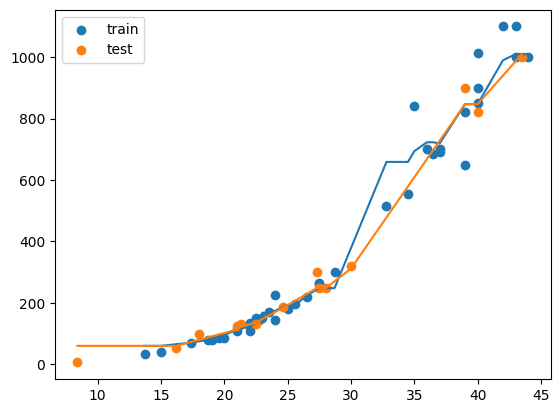

In [138]:
plt.scatter(train_input, train_target, label='train')
plt.plot(sorted(train_input), knr.predict(sorted(train_input)))
plt.scatter(test_input, test_target, label='test')
plt.plot(sorted(test_input), knr.predict(sorted(test_input)))
plt.legend()
plt.show()

In [139]:
# 3개의 최근접 이웃으로 회귀 수행
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


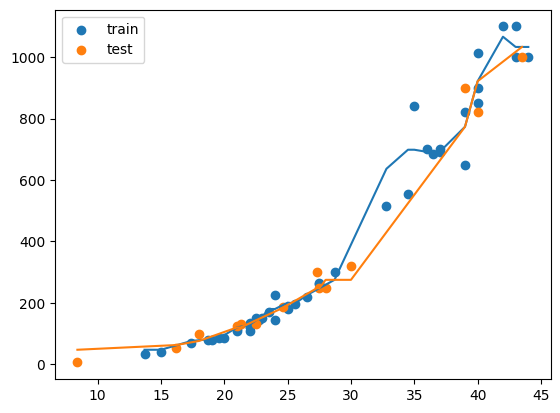

In [140]:
plt.scatter(train_input, train_target, label='train')
plt.plot(sorted(train_input), knr.predict(sorted(train_input)))
plt.scatter(test_input, test_target, label='test')
plt.plot(sorted(test_input), knr.predict(sorted(test_input)))
plt.legend()
plt.show()

## 확인문제

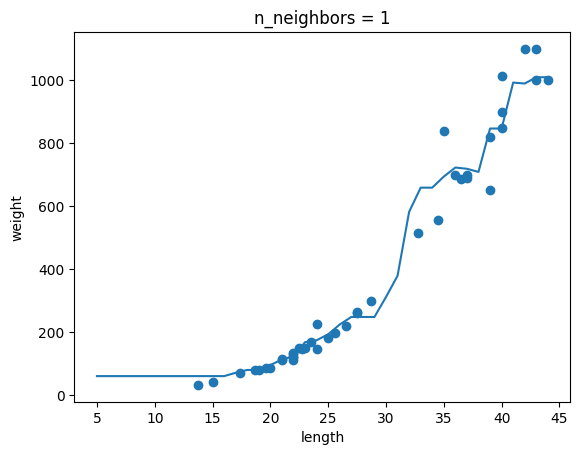

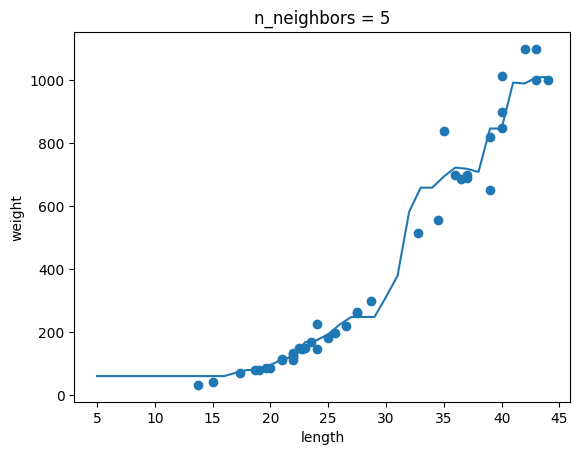

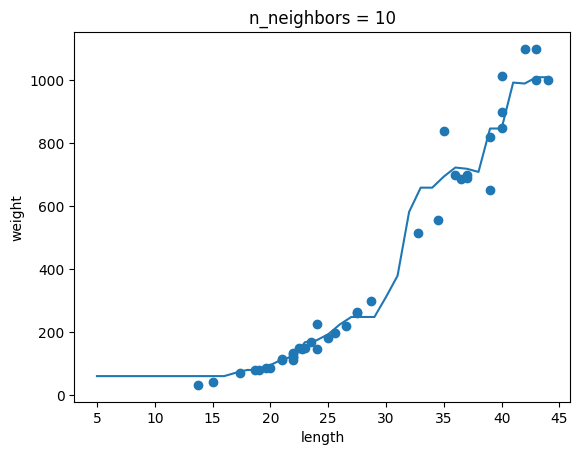

In [141]:
knr = KNeighborsRegressor()

# test 데이터 생성
x = np.arange(5, 45).reshape(-1, 1)

# n_neighbors를 1, 5, 10으로 변경하며 학습
for n in [1, 5, 10]:
    # 
    knr.fit(train_input, train_target)

    # test 데이터 예측
    prediction = knr.predict(x)

    # 결과 시각화
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 선형 회귀

## k-최근접 이웃의 한계

In [142]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
                         1000.0, 1000.0])

In [143]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# train, test 데이터를 열벡터로 변환
train_input = train_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
test_input = test_input.reshape(-1,1)
test_target = test_target.reshape(-1,1)
# 

In [144]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

test_data = np.array([[50]])
print(knr.predict(test_data))

[[1033.33333333]]


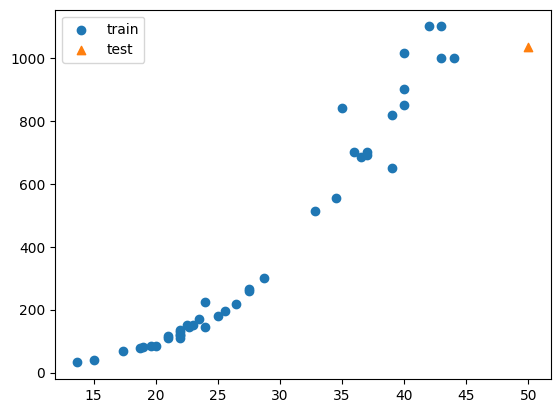

In [145]:
# test 데이터의 이웃, 이웃과의 거리 계산
distance, indexes = knr.kneighbors(test_data)

# 결과 시각화
plt.scatter(train_input, train_target, label='train')
# 
plt.scatter(test_data, knr.predict(test_data), marker='^', label='test')
plt.legend()
plt.show()

In [146]:
# 이웃 데이터들의 평균 값과 test_data의 예측 값 비교
neighbors_means = np.mean(train_target[indexes], axis=1)

print(neighbors_means)
print(knr.predict(test_data))

[[1033.33333333]]
[[1033.33333333]]


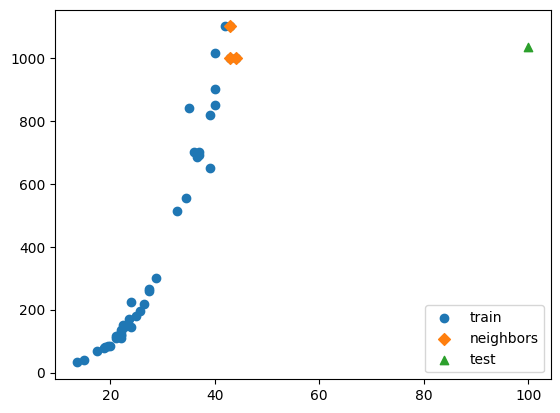

In [147]:
test_data2 = np.array([[100]])

distances, indexes = knr.kneighbors(test_data2)

plt.scatter(train_input, train_target, label='train')
plt.scatter(train_input[indexes], train_target[indexes], marker='D', label='neighbors')
plt.scatter(test_data2, knr.predict(test_data2), marker='^', label='test')
plt.legend(loc='lower right')
plt.show()

## 선형 회귀

In [148]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict(test_data))

[[1241.83860323]]


In [149]:
# 기울기(coefficient)와 절편(intercept) 확인
print(lr.coef_, lr.intercept_)

[[39.01714496]] [-709.01864495]


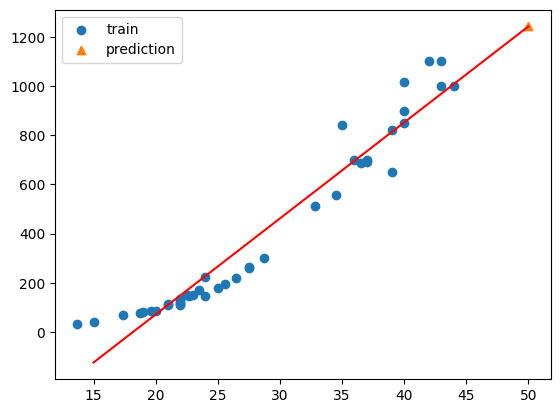

In [150]:
x = np.arange(15, 51)

plt.scatter(train_input, train_target, label='train')
# 15에서 50까지 1차 방정식 그래프
plt.plot(x, x*lr.coef_[0] + lr.intercept_, color='red')

# 50cm 농어 데이터
plt.scatter(test_data, lr.predict(test_data), marker='^', label='prediction')
plt.legend()
plt.show()

In [151]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


## 다항 회귀

In [152]:
train_poly = np.column_stack([train_input ** 2, train_input])
test_poly = np.column_stack([test_input ** 2, test_input])

In [153]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [154]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

test_data = np.array([[50**2, 50]])
print(lr.predict(test_data))

[[1573.98423528]]


In [155]:
# coefficient, intercept 확인
print(lr.coef_, lr.intercept_)

[[  1.01433211 -21.55792498]] [116.05021078]


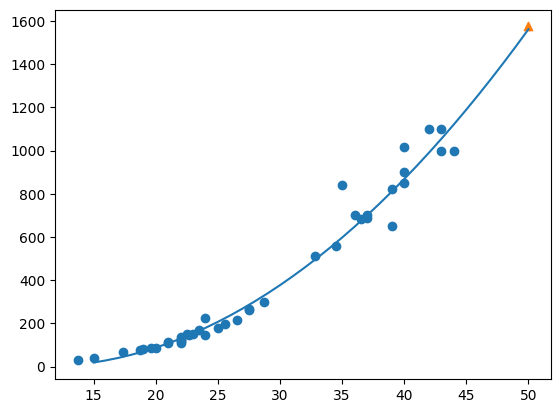

In [156]:
x = np.arange(15, 51)
plt.scatter(train_input, train_target)

# x에 대한 2차 방정식 계산
plt.plot(x, 1.01*x**2 - 21.6*x + 116.05)

# 
plt.scatter(50, lr.predict(test_data), marker='^')
plt.show()

In [157]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
